# Two-Way IMDB Film Database Sentiment Analysis

## Project Goals:

Analyze 25,000 movie reviews in IMDB if positive (1) or negative (0) sentiment.

The data set is provided by preprocessed by Keras with words transcribed to a number-encoded vocabulary.

## Loading IMDB sentiment data

In [1]:
import tensorflow as tf
from keras.layers.recurrent import LSTM
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


In [2]:
max_features = 20000   # 20000 most common items from vocabulary
maxlen = 80   # word length of a review
batch_size = 32

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# check the contents of the vectors. These are the encoded words and the positive/negative label.
print(len(x_train), 'Train Sequences')
print(len(x_test), 'Test Sequences')
print('\nFirst item features: ',x_train[0])
print('\nFirst item label: ',y_train[0])

25000 Train Sequences
25000 Test Sequences

First item features:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5

## Padding sequences (reviews) that are too short and cutting too long

In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen) 
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


## Defining LSTM model

In [5]:
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# note: the output layer has only one single node meaning good (1) or bad (0)
model.add(Dense(1, activation='sigmoid'))

# not so nice model representation
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________



## Run and evaluate model

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)

print('Test score: ', score)
print('Test accuracy: ', acc)

C:\Users\ChristianV700\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 178s 7ms/step - loss: 0.4616 - accuracy: 0.7801 - val_loss: 0.3846 - val_accuracy: 0.8304
Epoch 2/15
25000/25000 [==============================] - 178s 7ms/step - loss: 0.3035 - accuracy: 0.8761 - val_loss: 0.3788 - val_accuracy: 0.8358
Epoch 3/15
25000/25000 [==============================] - 177s 7ms/step - loss: 0.2243 - accuracy: 0.9128 - val_loss: 0.4214 - val_accuracy: 0.8285
Epoch 4/15
25000/25000 [==============================] - 178s 7ms/step - loss: 0.1586 - accuracy: 0.9410 - val_loss: 0.4922 - val_accuracy: 0.8285
Epoch 5/15
25000/25000 [==============================] - 177s 7ms/step - loss: 0.1151 - accuracy: 0.9583 - val_loss: 0.5734 - val_accuracy: 0.8032
Epoch 6/15
25000/25000 [==============================] - 177s 7ms/step - loss: 0.0884 - accuracy: 0.9687 - val_loss: 0.6184 - val_accuracy: 0.8143
Epoch 7/15
25000/25000 [==============================] - 177s

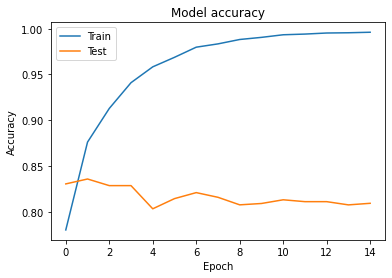

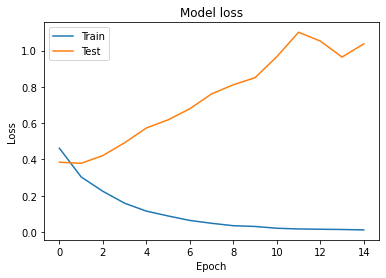

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

## Summary

This is a quite good training accuracy.

However, the validaton accuracy may still require some improvement (80.5%).

LSTMs (RNNs) can be difficult to improve.

The correct choice of batch size, loss algorithm, and optimizer is critical.